# Test void size function routines

This notebook computes the void size function routines of the ``cosmo`` class

In [1]:
import colibri.cosmology as cc
import colibri.useful_functions as UU
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rc('font',size=25,family='serif')

### Fixed parameters for the plot

In [2]:
DNL  = -0.8                       # Underdensity for voids (typical values are -0.8, -0.7)
IMAX = 200                        # Max index of sum (must be >= 200)

### Define a ``cosmo`` instance

In [3]:
C=cc.cosmo(Omega_m=0.26,Omega_b=0.044,ns=0.96,As=2.168e-9,h=0.715)

### Arrays of radii (Mpc/h), scales (h/Mpc) and redshifts

In [4]:
RR = np.geomspace(0.1,50.,101)  # Radii of voids
zz = np.linspace(0.,5.,11)
kk = np.logspace(-4.,2,1001)

### Power spectra

Compute linear spectra and extrapolate them up to very large wavenumbers

In [5]:
#===========
# Linear power spectra
#===========
_,pk=C.camb_Pk(z=zz,k=kk)

#===========
# Extrapolate linear power spectra
#===========
k_arr  = []
pk_arr = []
for iz in range(len(np.atleast_1d(zz))):
    k_ext,pk_ext = UU.extrapolate_log(kk,pk[iz],1e-4,1e5)
    pk_arr.append(pk_ext)
k_arr  = np.array(k_ext )
pk_arr = np.array(pk_arr)

### Void size functions

We compare three models, the linear, the Sheth-van der Weygaert  and the volume conserving one,
with different critical densities (the default for ``delta_c`` is 1.686).

In [6]:
RL_L,VSF_L  = C.void_size_function(R=RR,z=zz,k=k_arr,pk=pk_arr,Delta_NL=DNL,
                                   model = 'linear',max_index=IMAX)
RL_S,VSF_S  = C.void_size_function(R=RR,z=zz,k=k_arr,pk=pk_arr,Delta_NL=DNL,
                                   model = 'SvdW'  ,max_index=IMAX)
RL_V,VSF_V  = C.void_size_function(R=RR,z=zz,k=k_arr,pk=pk_arr,Delta_NL=DNL,
                                   model = 'Vdn'   ,max_index=IMAX)

RL_L,VSF_Ll = C.void_size_function(R=RR,z=zz,k=k_arr,pk=pk_arr,Delta_NL=DNL,
                                   model = 'linear',max_index=IMAX,delta_c=1.06)
RL_S,VSF_Sl = C.void_size_function(R=RR,z=zz,k=k_arr,pk=pk_arr,Delta_NL=DNL,
                                   model = 'SvdW'  ,max_index=IMAX,delta_c=1.06)
RL_V,VSF_Vl = C.void_size_function(R=RR,z=zz,k=k_arr,pk=pk_arr,Delta_NL=DNL,
                                   model = 'Vdn'   ,max_index=IMAX,delta_c=1.06)

### Plot

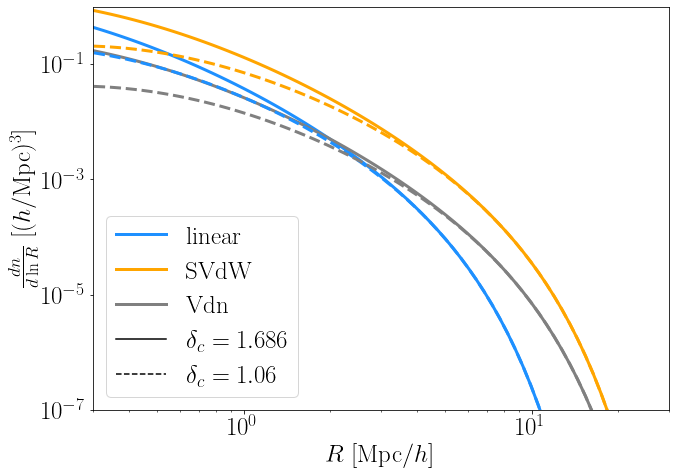

In [7]:
plt.figure(figsize=(10,7))
L,B,R,T=0.15,0.15,0.95,0.95
plt.subplots_adjust(L,B,R,T)
LW = 3.0

# VSF with high delta_c
plt.loglog(RL_L,VSF_L[0],'dodgerblue',lw=LW,label='linear')
plt.loglog(RL_S,VSF_S[0],'orange'    ,lw=LW,label='SVdW')
plt.loglog(RL_V,VSF_V[0],'gray'      ,lw=LW,label='Vdn')
# VSF with low delta_c
plt.loglog(RL_L,VSF_Ll[0],'dodgerblue',lw=LW,ls='--')
plt.loglog(RL_S,VSF_Sl[0],'orange'    ,lw=LW,ls='--')
plt.loglog(RL_V,VSF_Vl[0],'gray'      ,lw=LW,ls='--')

# For legend
plt.plot(np.nan,np.nan,'k',ls='-' ,label='$\delta_c=1.686$')
plt.plot(np.nan,np.nan,'k',ls='--',label='$\delta_c=1.06$')
plt.legend()
# Labels
plt.xlabel('$R \ [\mathrm{Mpc}/h]$')
plt.ylabel('$\\frac{dn}{d\ln R} \ [(h/\mathrm{Mpc})^3]$')
# Limits
plt.xlim(0.3,30)
plt.ylim(1e-7,1e0)

plt.show()